In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
# Importing the data 
df = pd.read_csv(r"C:\Users\91735\Downloads\titanic_train.csv")

In [3]:
# Previewing the data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

1. Missing values in Age,Cabin and Embarked Columns.
2. More than 70% values are missing in Cabin column, we should drop this column.
3. Few columns have inappropriate data_types.

In [8]:
df.drop(columns=['Cabin'], inplace=True)

In [16]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [11]:
# Imputing Missing Values 
# Strategy - mean
df.Age.fillna(df.Age.mean(),inplace=True)

In [12]:
df.Age.isna().sum()

0

In [13]:
# Imputing missing values for Embarked 
# Finding the most appeared value in Embarked column
df.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [14]:
df.Embarked.fillna('S',inplace = True)

In [15]:
df.Embarked.isna().sum()

0

In [16]:
df.dtypes

PassengerId       int64
Survived       category
Pclass         category
Name             object
Sex            category
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Embarked         object
dtype: object

## Changing the data_types for the following columns
1. Survived(Category)
2. Pclass(Category)
3. Sex(Category)
4. Age(Int)
5. Embarked(Category)

In [17]:
df['Survived'] = df['Survived'].astype('category')
df['Pclass']= df['Pclass'].astype('category')
df['Sex']= df['Sex'].astype('category')
df['Age']= df['Age'].astype('int')
df['Embarked']= df['Embarked'].astype('category')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    int32   
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    category
dtypes: category(4), float64(1), int32(1), int64(3), object(2)
memory usage: 49.4+ KB


In [19]:
# Five Points Summary 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.0,223.5000,446.0000,668.5,891.0000
Age,891.0,29.544332,13.013778,0.0,22.0000,29.0000,35.0,80.0000
SibSp,891.0,0.523008,1.102743,0.0,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.0,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


## Univariate analysis


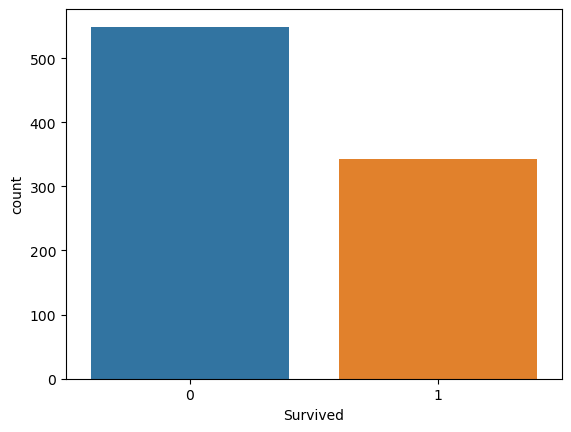

In [52]:
sns.countplot(data=df,x='Survived')
plt.show()

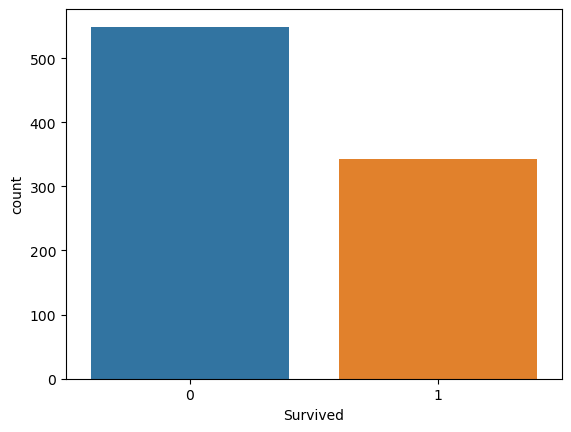

Out of 891, 62% people died in the accident


In [137]:
sns.countplot(data=df,x='Survived')
plt.show()
death_percent = round((df['Survived'].value_counts().values[0]/891)*100)
print("Out of 891, {}% people died in the accident".format(death_percent))

Pclass
3    55.106622
1    24.242424
2    20.650954
Name: count, dtype: float64


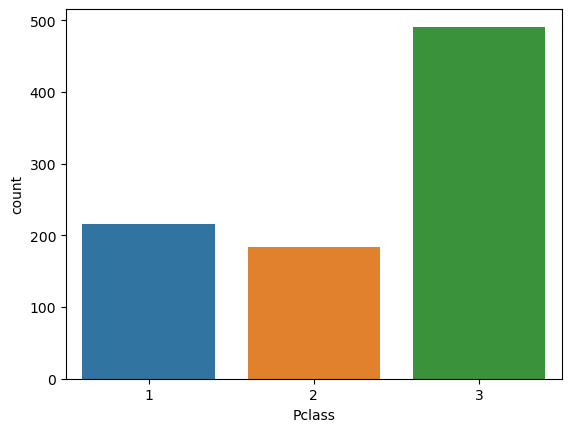

In [105]:
print(df['Pclass'].value_counts()/891*100)

sns.countplot(data=df,x='Pclass')
plt.show()


Sex
male      64.758698
female    35.241302
Name: count, dtype: float64


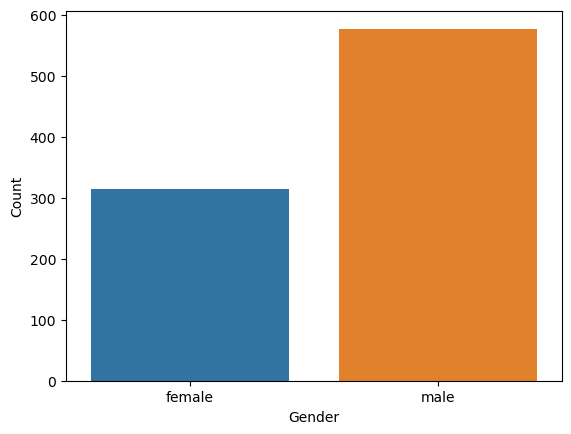

In [116]:
print(df['Sex'].value_counts()/891*100)

sns.countplot(data=df,x='Sex')
plt.ylabel('Count')
plt.xlabel('Gender')
plt.show()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64


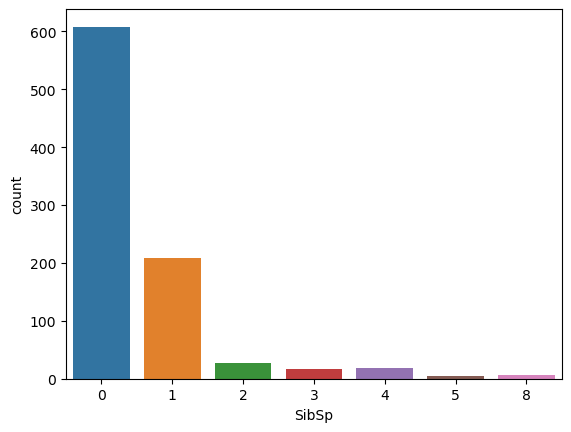

In [129]:
print(df['SibSp'].value_counts())

sns.countplot(data=df,x='SibSp')
plt.show()

Parch
0    76.094276
1    13.243547
2     8.978676
5     0.561167
3     0.561167
4     0.448934
6     0.112233
Name: count, dtype: float64


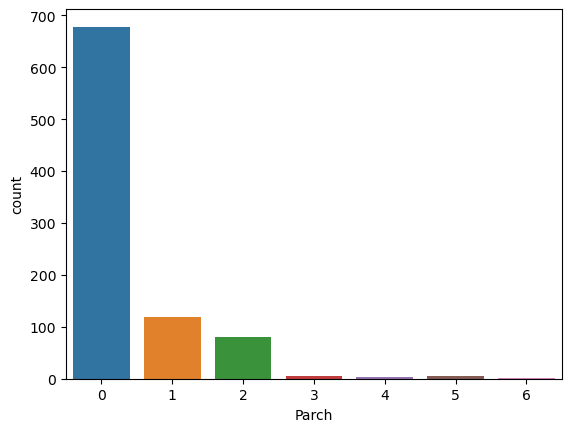

In [138]:
print(df['Parch'].value_counts()/891*100)
sns.countplot(data=df,x='Parch')
plt.show()

Embarked
S    72.502806
C    18.855219
Q     8.641975
Name: count, dtype: float64


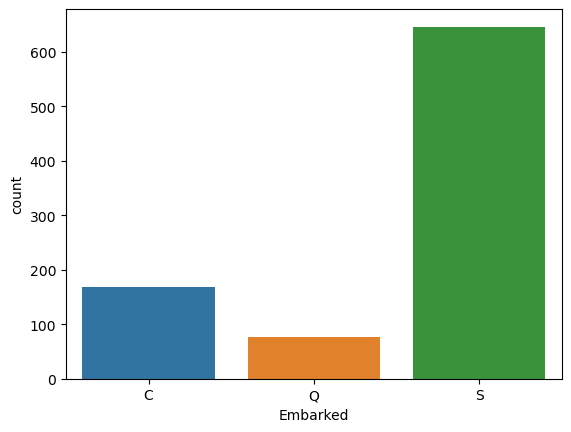

In [145]:
print(df['Embarked'].value_counts()/891*100)
sns.countplot(data=df,x='Embarked')
plt.show()

Skew = 0.45956263424701577 
Kurtosis = 0.9865867453652877 


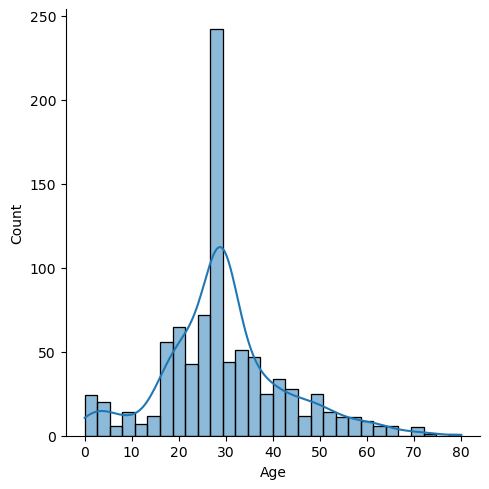

In [158]:
sns.displot(data=df,x='Age',kind='hist',kde=True)

print('Skew = {} '.format(df.Age.skew()))

print('Kurtosis = {} '.format(df.Age.kurt()))

Text(0.5, 0, 'Age')

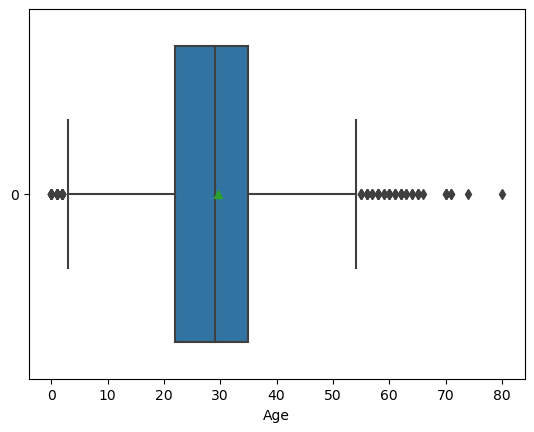

In [175]:
sns.boxplot(df['Age'],orient='h',showmeans=True)
plt.xlabel('Age')

In [234]:
age_number = df.query('Age > 60 and Age < 70')


In [239]:
count_age = age_number.shape[0]

print('Number of people aged between 60 and 70 :',count_age)

Number of people aged between 60 and 70 : 15


In [274]:
print('Number of people aged between 60 and 70 :',df.query('Age > 60 and Age < 70').shape[0])
print('Number of people aged between 70 and 75 :',df.query('Age >= 70 and Age <= 75').shape[0])
print('Number of people aged greater than 75 :',df.query('Age > 75').shape[0])

print('-'*50)
print('Number of Child aged between 0 and 1 :',df.query('Age <=1').shape[0])

Number of people aged between 60 and 70 : 15
Number of people aged between 70 and 75 : 6
Number of people aged greater than 75 : 1
--------------------------------------------------
Number of Child aged between 0 and 1 : 14


## Conclusion
1. For all practical purposes age can be considered as normal distribution
2. Deeper analysis is required for outlier detection

Skew = 4.787316519674893
Kurt = 33.39814088089868


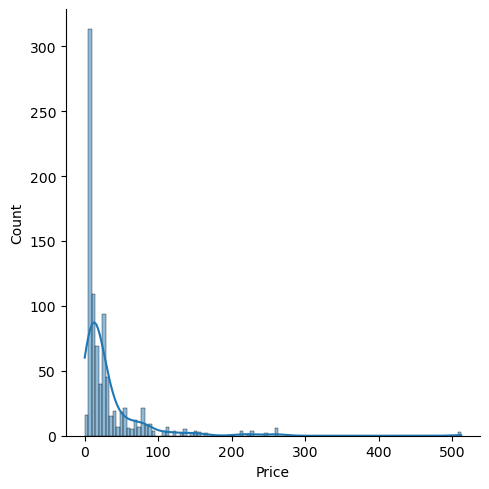

In [275]:
print('Skew = {}'.format(df['Fare'].skew()))
print('Kurt = {}'.format(df['Fare'].kurt()))

sns.displot(data=df,x='Fare',kde=True,kind='hist')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

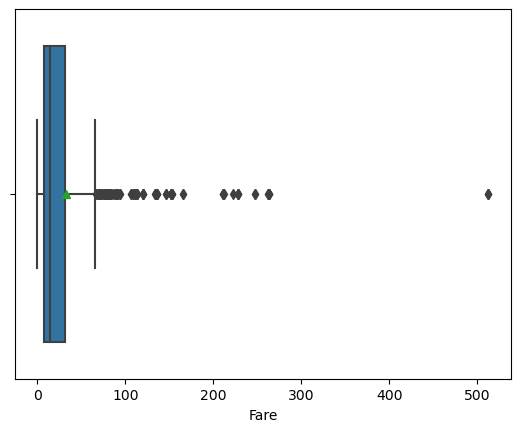

In [270]:

sns.boxplot(data=df,x='Fare',orient='h',showmeans=True)
plt.show()

In [290]:
print('Number of people who spent less than 100 :',df.query('Fare < 100').shape[0])
print('Number of people who spent between 100 and 200 :', df.query('Fare >= 100 and Fare < 200').shape[0])
print('Number of people who spent between 200 and 300 :',df.query('Fare > 200 and Fare < 300').shape[0])
print('Number pf people who spent greater than 300 :', df.query('Fare > 300').shape[0])

Number of people who spent less than 100 : 838
Number of people who spent between 100 and 200 : 33
Number of people who spent between 200 and 300 : 17
Number pf people who spent greater than 300 : 3


## Conclusion 
1. Fare is highly skewed, most passengers bought cheaper tickets
2. Outliers in the data


## Multivariate analysis

<Axes: xlabel='Survived', ylabel='count'>

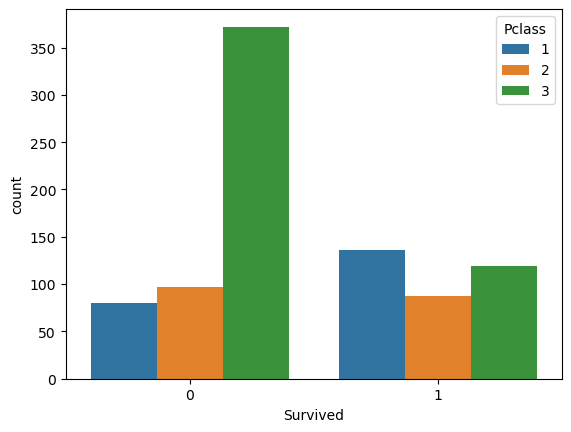

In [296]:
# survived vs Pclass
sns.countplot(data=df,x='Survived',hue='Pclass')

In [309]:
pd.crosstab(df['Pclass'],df['Survived']).apply(lambda x : round(x/x.sum()*100,2),axis=1)

Survived,0,1
Pclass,,
1,37.04,62.96
2,52.72,47.28
3,75.76,24.24


Survived,0,1
Sex,,
female,25.80,74.20
male,81.11,18.89


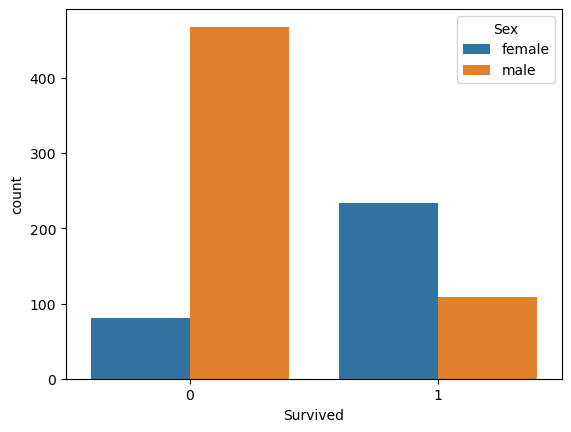

In [317]:
sns.countplot(data=df,x='Survived',hue='Sex')
pd.crosstab(df['Sex'],df['Survived']).apply(lambda x: round((x/x.sum())*100,2),axis=1)

Survived,0,1
Embarked,,
C,44.64,55.36
Q,61.04,38.96
S,66.10,33.90


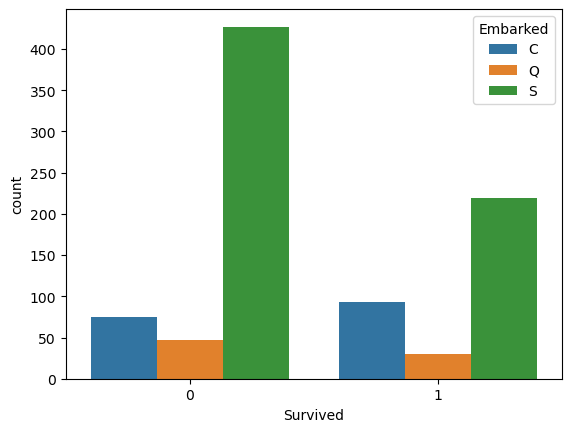

In [323]:
sns.countplot(data=df,x='Survived',hue='Embarked')

pd.crosstab(df['Embarked'],df['Survived']).apply(lambda x: round((x/x.sum())*100,2),axis=1)

In [344]:
survivors = df[df['Survived']==0]['Age']
Non_survivors = df[df['Survived']==1]['Age']

<Axes: xlabel='Age', ylabel='Density'>

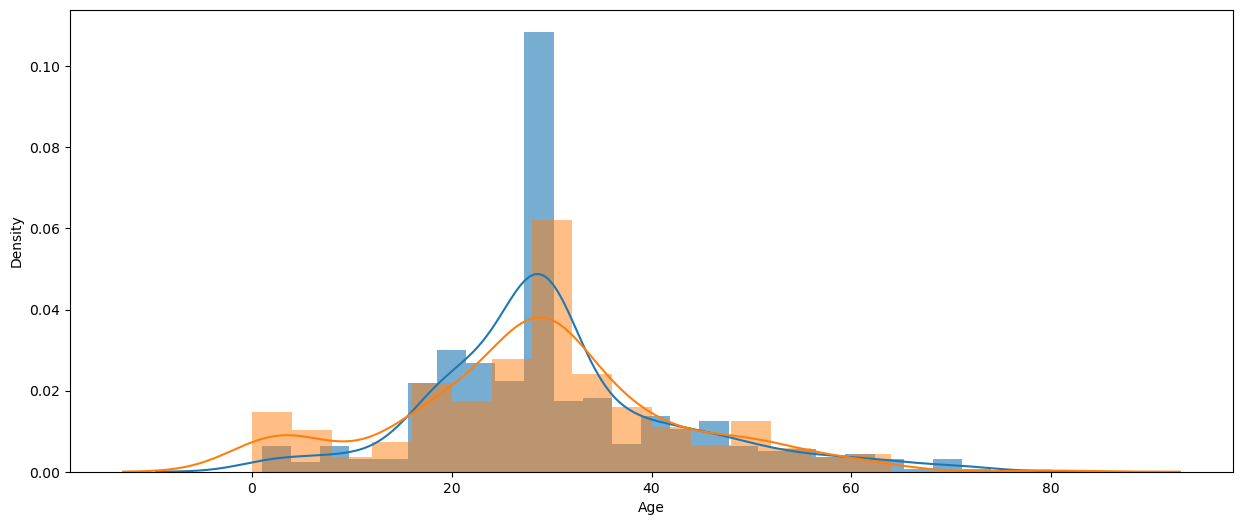

In [363]:
plt.figure(figsize=(15,6))
sns.distplot(survivors,hist_kws={'alpha':0.6})
sns.distplot(Non_survivors,hist_kws={'alpha':0.5})

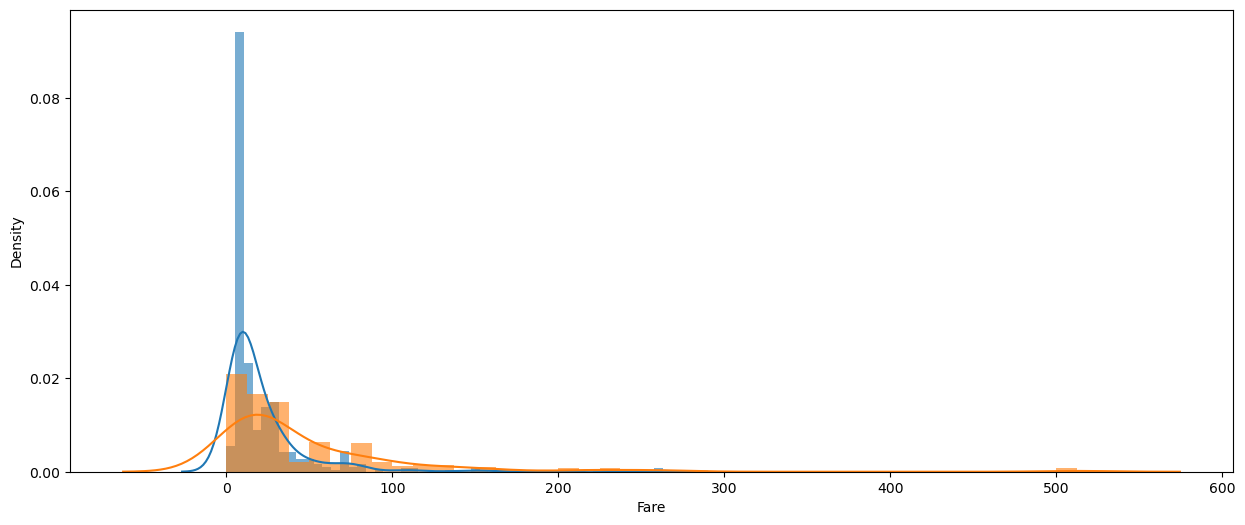

In [372]:
plt.figure(figsize=(15,6))
sns.distplot(df[df['Survived']==0]['Fare'],hist_kws={'alpha':0.6})
sns.distplot(df[df['Survived']==1]['Fare'],hist_kws={'alpha':0.6})
plt.show()

In [382]:
df['Family_size'] = df['SibSp']+df['Parch']

In [383]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S,0


In [384]:
def family_type(number):
    if number==0:
        return "Alone"
    elif number >0 and number <=4:
        return 'Medium'
    else:
        return 'Large'

In [390]:
df['Family_type'] = df['Family_size'].apply(family_type)

In [398]:
df.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Family_size,Family_type
582,583,0,2,"Downton, Mr. William James",male,54,28403,26.0,S,0,Alone


In [401]:
pd.crosstab(df['Survived'],df['Family_type']).T.apply(lambda x: round((x/x.sum())*100,1),axis=1)

Survived,0,1
Family_type,,
Alone,69.6,30.4
Large,85.1,14.9
Medium,44.0,56.0
